# Spotify Afrobeats Recommendation System
By Afolabi Cardoso

## Exploratory Data Analysis

In this notebook, I explore the features of the Afrobeats playlist. I will see which features give the best clustering. I will also perform a time series analysis of the features to see how they change each year.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
from sklearn.decomposition import PCA

from scipy import sparse
import plotly.express as px
import time

#### Import afrobeats playlist data

In [3]:
afrobeats = pd.read_csv('../data/afrobeats.csv')
afrobeats.head()

track_uri                 track_name   artist_name  \
0  0mDRuZmReEm6DquPLJlcEm        Oleku (feat. Brymo)    Ice Prince   
1  1tvi8tv0eykhNcV1WtaIqO                  Move Back         5five   
2  5YgyvTZmdkIfFOnj8ri8mZ                   Pakurumo        WizKid   
3  2cWdhA4ZDBvYuHRKKIPT3k  The Matter (feat. Wizkid)  Maleek Berry   
4  4voOsb8qpJ569JaMiGAyrl  Slow Down (feat. Wiz Kid)        R2Bees   

               artist_uri                                album  track_pop  \
0  1sSt1DqqqFLkPwfrqafVyn                  Oleku (feat. Brymo)         44   
1  37zb1JQnDV9dRLatrASEj1                            Move Back         42   
2  3tVQdUvClmAT7URs9V3rsp                            Superstar         34   
3  520qA5VGL9iI0SbmEnTVNg            The Matter (feat. Wizkid)         46   
4  0LFsP7WPfu5inz9a1amcE4  Refuse to Be Broke: Da Revolution 2         49   

  year_released  danceability  energy   key  ...  valence    tempo  \
0    2010-09-21         0.544   0.730   1.0  ...    0.751  162.112   
1    2011-04-08         0.793   0.734  11.0  ...    0.793  125.032   
2    2011-07-01         0.879   0.737   2.0  ...    0.967  119.990   
3    2013-03-10         0.697   0.841   2.0  ...    0.808  103.070   
4          2014         0.520   0.717   6.0  ...    0.704  135.550   

             type                      id  \
0  audio_features  0mDRuZmReEm6DquPLJlcEm   
1  audio_features  1tvi8tv0eykhNcV1WtaIqO   
2  audio_features  5YgyvTZmdkIfFOnj8ri8mZ   
3  audio_features  2cWdhA4ZDBvYuHRKKIPT3k   
4  audio_features  4voOsb8qpJ569JaMiGAyrl   

                                    uri  \
0  spotify:track:0mDRuZmReEm6DquPLJlcEm   
1  spotify:track:1tvi8tv0eykhNcV1WtaIqO   
2  spotify:track:5YgyvTZmdkIfFOnj8ri8mZ   
3  spotify:track:2cWdhA4ZDBvYuHRKKIPT3k   
4  spotify:track:4voOsb8qpJ569JaMiGAyrl   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/0mDRuZmReEm6...   
1  https://api.spotify.com/v1/tracks/1tvi8tv0eykh...   
2  https://api.spotify.com/v1/tracks/5YgyvTZmdkIf...   
3  https://api.spotify.com/v1/tracks/2cWdhA4ZDBvY...   
4  https://api.spotify.com/v1/tracks/4voOsb8qpJ56...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/0mDR...     291364.0   
1  https://api.spotify.com/v1/audio-analysis/1tvi...     237107.0   
2  https://api.spotify.com/v1/audio-analysis/5Ygy...     212006.0   
3  https://api.spotify.com/v1/audio-analysis/2cWd...     198058.0   
4  https://api.spotify.com/v1/audio-analysis/4voO...     261547.0   

  time_signature      genre  
0            5.0  afrobeats  
1            4.0  afrobeats  
2            4.0  afrobeats  
3            4.0  afrobeats  
4            5.0  afrobeats  

[5 rows x 26 columns]

#### Import fela's playlist data

In [5]:
fela = pd.read_csv('../data/fela.csv')
fela.head(2)

track_uri      track_name artist_name              artist_uri  \
0  11GDQVqIEKAB4QKOcIVOvG          Zombie   Fela Kuti  5CG9X521RDFWCuAhlo6QoR   
1  6sNNtFKdCz0bnjx7IEXyl2  Expensive Shit   Fela Kuti  5CG9X521RDFWCuAhlo6QoR   

            album  track_pop year_released  danceability  energy  key  ...  \
0          Zombie         45    1977-01-01         0.712   0.942    2  ...   
1  Expensive Shit         38    1975-01-01         0.614   0.876    7  ...   

   valence    tempo            type                      id  \
0    0.585  131.812  audio_features  11GDQVqIEKAB4QKOcIVOvG   
1    0.682  122.635  audio_features  6sNNtFKdCz0bnjx7IEXyl2   

                                    uri  \
0  spotify:track:11GDQVqIEKAB4QKOcIVOvG   
1  spotify:track:6sNNtFKdCz0bnjx7IEXyl2   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/11GDQVqIEKAB...   
1  https://api.spotify.com/v1/tracks/6sNNtFKdCz0b...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/11GD...       745653   
1  https://api.spotify.com/v1/audio-analysis/6sNN...       793200   

  time_signature genre  
0              4  fela  
1              4  fela  

[2 rows x 26 columns]

#### Select the features we will use for EDA

In [6]:
features = ['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

#### Create a dataframe of the features we will use for analysis

In [7]:
df = afrobeats[features].copy()

In [8]:
df['track_name'] = afrobeats['track_name']

In [9]:
df.describe()

danceability       energy     loudness         mode  speechiness  \
count   1870.000000  1870.000000  1870.000000  1870.000000  1870.000000   
mean       0.749676     0.690035    -6.053026     0.477540     0.137191   
std        0.118031     0.143602     2.367208     0.499629     0.101595   
min        0.000000     0.174000   -21.272000     0.000000     0.000000   
25%        0.679000     0.597000    -7.168500     0.000000     0.058525   
50%        0.771000     0.703500    -5.827000     0.000000     0.100000   
75%        0.835000     0.797750    -4.529000     1.000000     0.189750   
max        0.978000     0.995000     0.318000     1.000000     0.550000   

       acousticness  instrumentalness     liveness      valence        tempo  
count   1870.000000       1870.000000  1870.000000  1870.000000  1870.000000  
mean       0.278272          0.023990     0.143381     0.686569   114.460867  
std        0.209485          0.092932     0.103704     0.193833    25.705027  
min        0.000294          0.000000     0.021800     0.000000     0.000000  
25%        0.106000          0.000000     0.086100     0.558250   100.081250  
50%        0.235000          0.000023     0.108000     0.712000   107.998500  
75%        0.417000          0.001508     0.159000     0.837750   120.021500  
max        0.916000          0.888000     0.879000     0.981000   233.936000

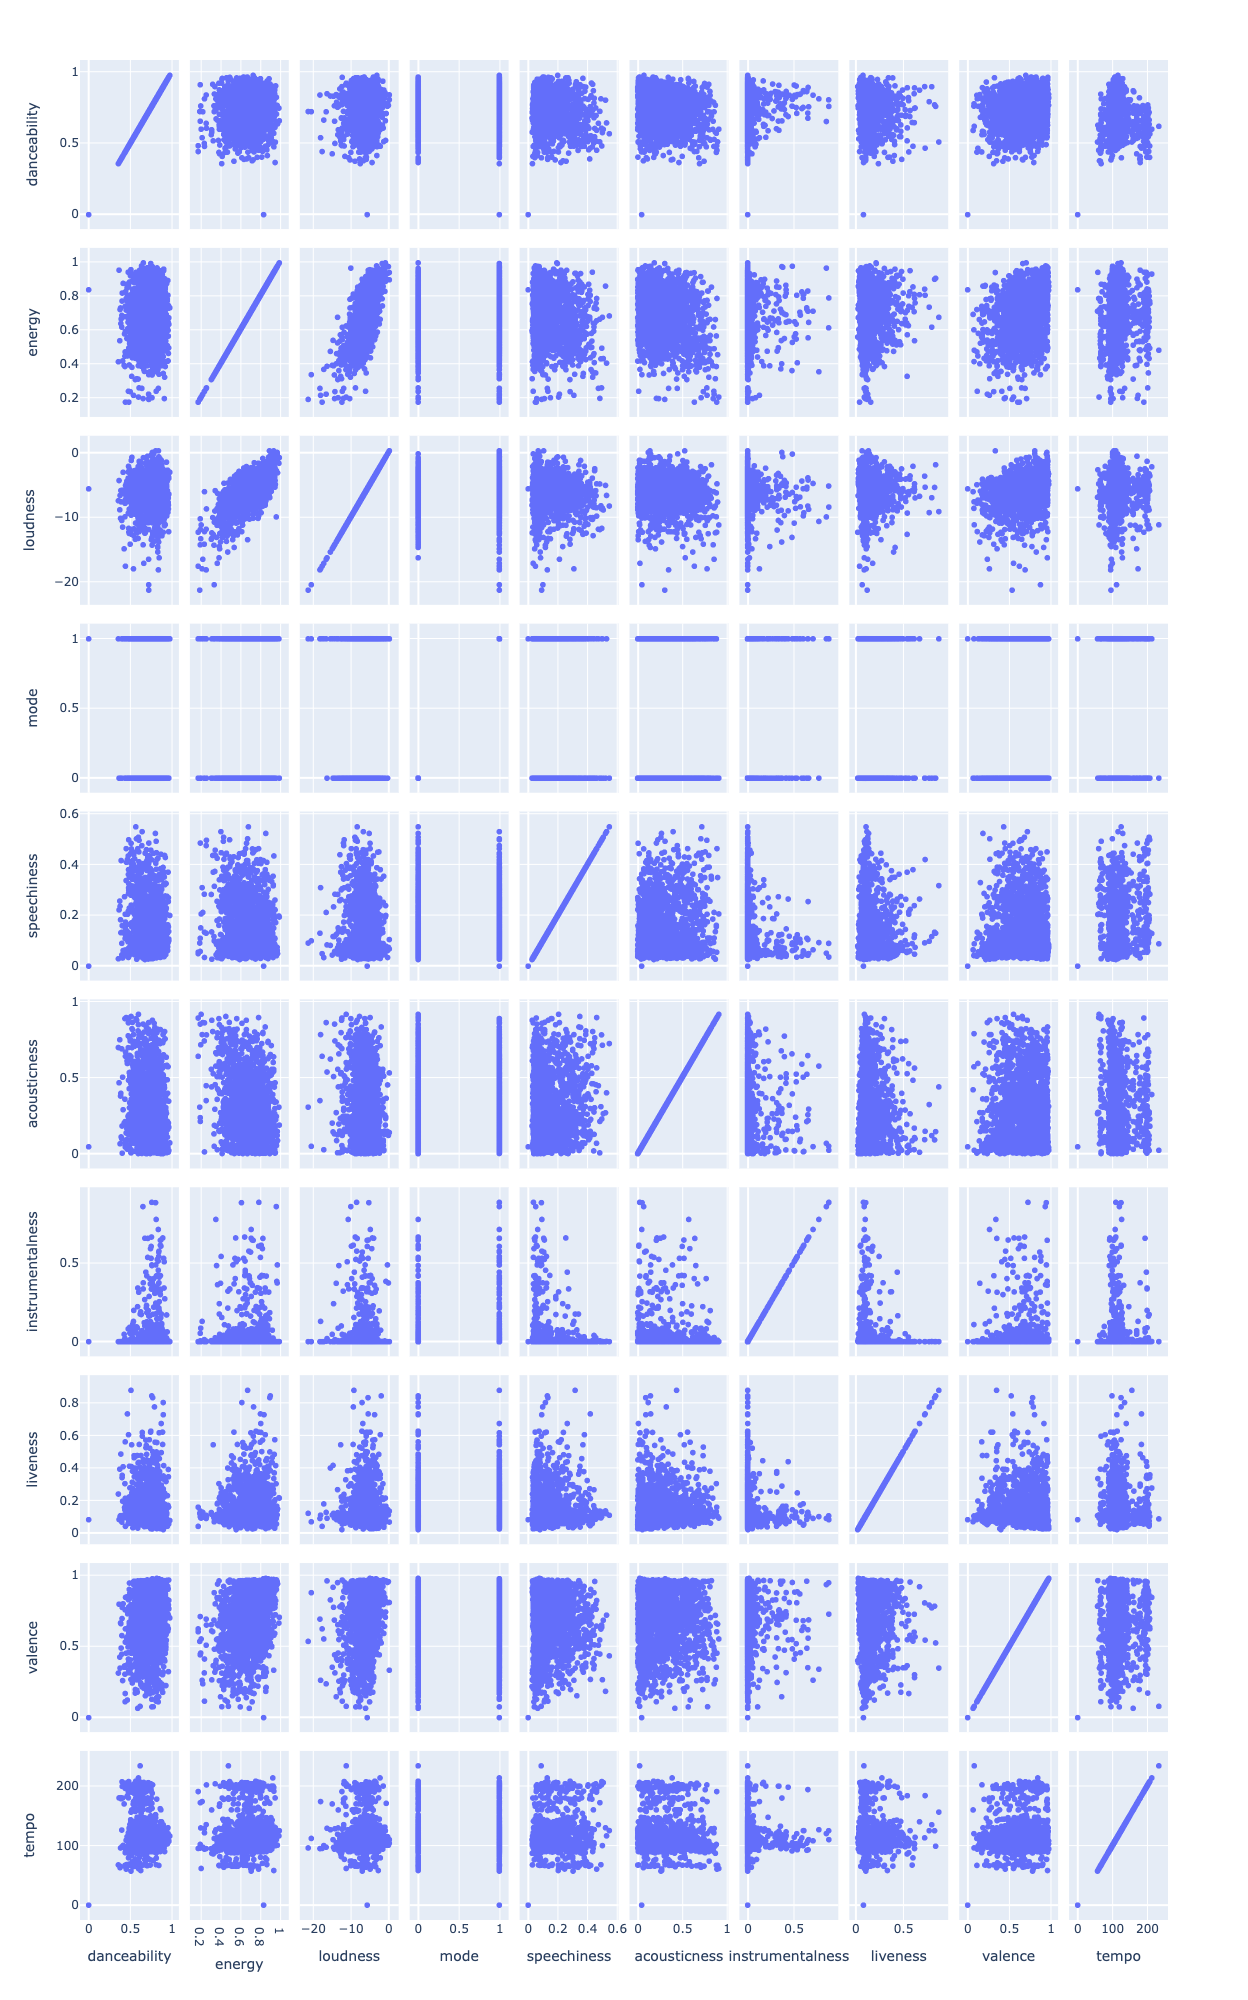

In [10]:
fig = px.scatter_matrix(df,
    dimensions=features, hover_name='track_name', height=2000)
fig.show()

#### Loudness, Energy, Danceability

Loudness, energy, and danceability all have strong relationships. I will anaylse the three features below

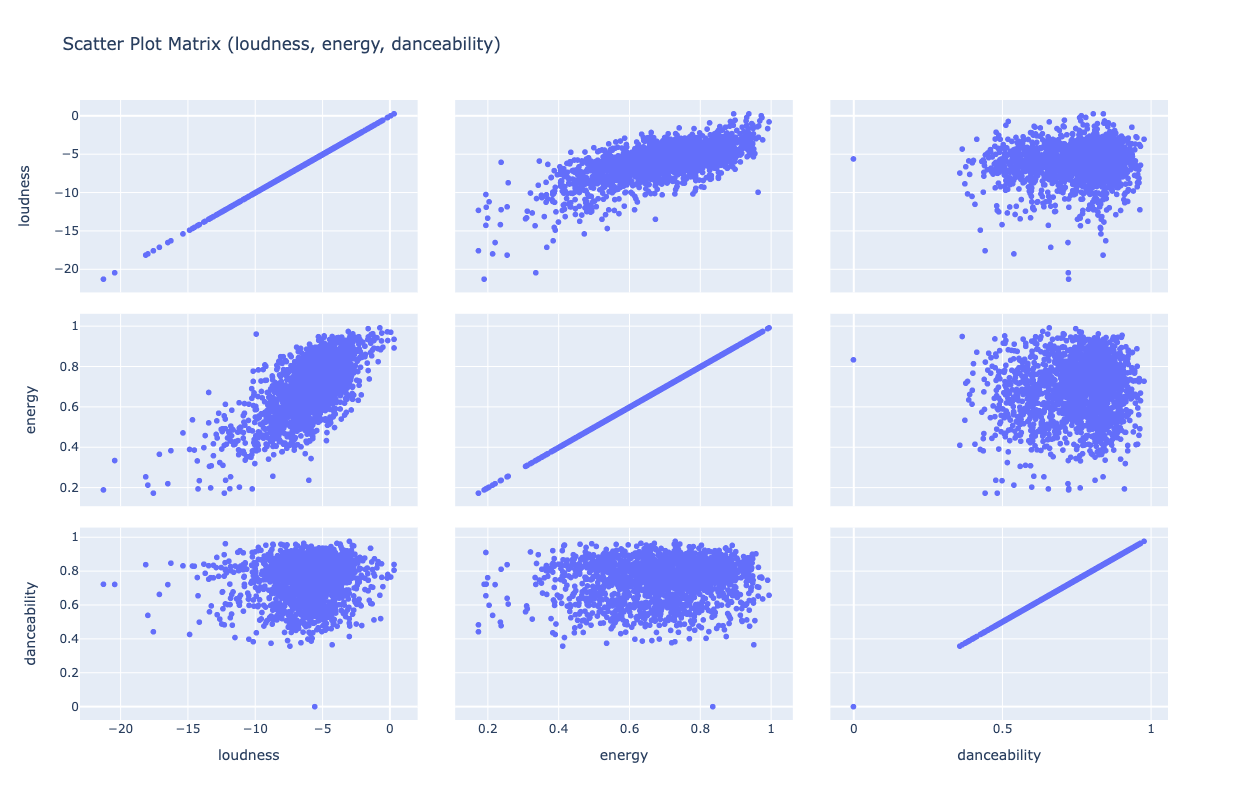

In [11]:
fig = px.scatter_matrix(df,
    dimensions=['loudness', 'energy', 'danceability'],hover_name='track_name', height=800, title = 'Scatter Plot Matrix (loudness, energy, danceability)')
fig.show();

#### K-means Algorithm

Using k-means algorithm, let's create clusters of songs with loudness, energy, and danceability as features. This will help us create sub-genres based on the overall song energy, loudness and danceability

This function takes in a dataframe and the number of clusters needed and returns the labels

In [12]:
def cluster_plots(df, k):
    #scale features
    ss = StandardScaler()
    df_ss = ss.fit_transform(df) 
    
    #instantiate kmeans
    km = KMeans(n_clusters=k)
    km.fit(df_ss)
    
    #add labels to the dataframe
    labels = km.labels_
    return labels

#### Using Silhouette score and inertia, evaluate the best value for k

#### Silhoutte Score

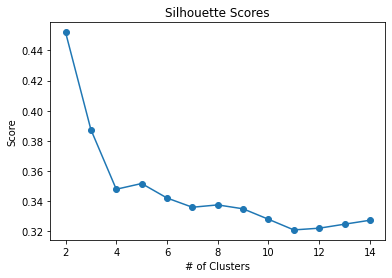

In [13]:
silhouette_list = []

for k in range(2, 15):
    #scale features
    ss = StandardScaler()
    df_ss = ss.fit_transform(df[['loudness','energy']]) 
    
    #kmeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_ss)
    silhouette_list.append(silhouette_score(df_ss, kmeans.labels_))

plt.plot(range(2, 15), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

#### Inertia (Elbow plot)

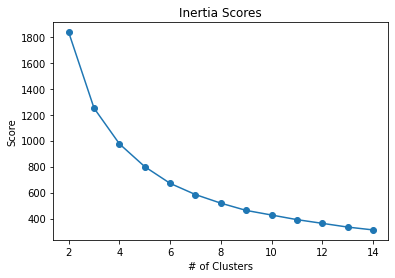

In [14]:
inertia_list = []

for k in range(2, 15):   
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_ss)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(2, 15), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

k = 4, seems to be a good number for clustering

#### Generate four clusters and create a clusters column

In [15]:
df['clusters'] = cluster_plots(df[['loudness','energy']],4)

In [16]:
df['clusters'].unique()

array([3, 2, 0, 1], dtype=int32)

In [17]:
df.head()

danceability  energy  loudness  mode  speechiness  acousticness  \
0         0.544   0.730    -4.299   0.0       0.1440         0.344   
1         0.793   0.734    -9.252   0.0       0.0981         0.323   
2         0.879   0.737    -5.412   1.0       0.0421         0.525   
3         0.697   0.841    -6.782   1.0       0.2710         0.224   
4         0.520   0.717    -3.006   0.0       0.3890         0.116   

   instrumentalness  liveness  valence    tempo                 track_name  \
0          0.000001     0.140    0.751  162.112        Oleku (feat. Brymo)   
1          0.000002     0.777    0.793  125.032                  Move Back   
2          0.005760     0.268    0.967  119.990                   Pakurumo   
3          0.000000     0.336    0.808  103.070  The Matter (feat. Wizkid)   
4          0.000000     0.249    0.704  135.550  Slow Down (feat. Wiz Kid)   

   clusters  
0         3  
1         3  
2         3  
3         3  
4         2

#### Using plotly to display an interactive scatter matrix

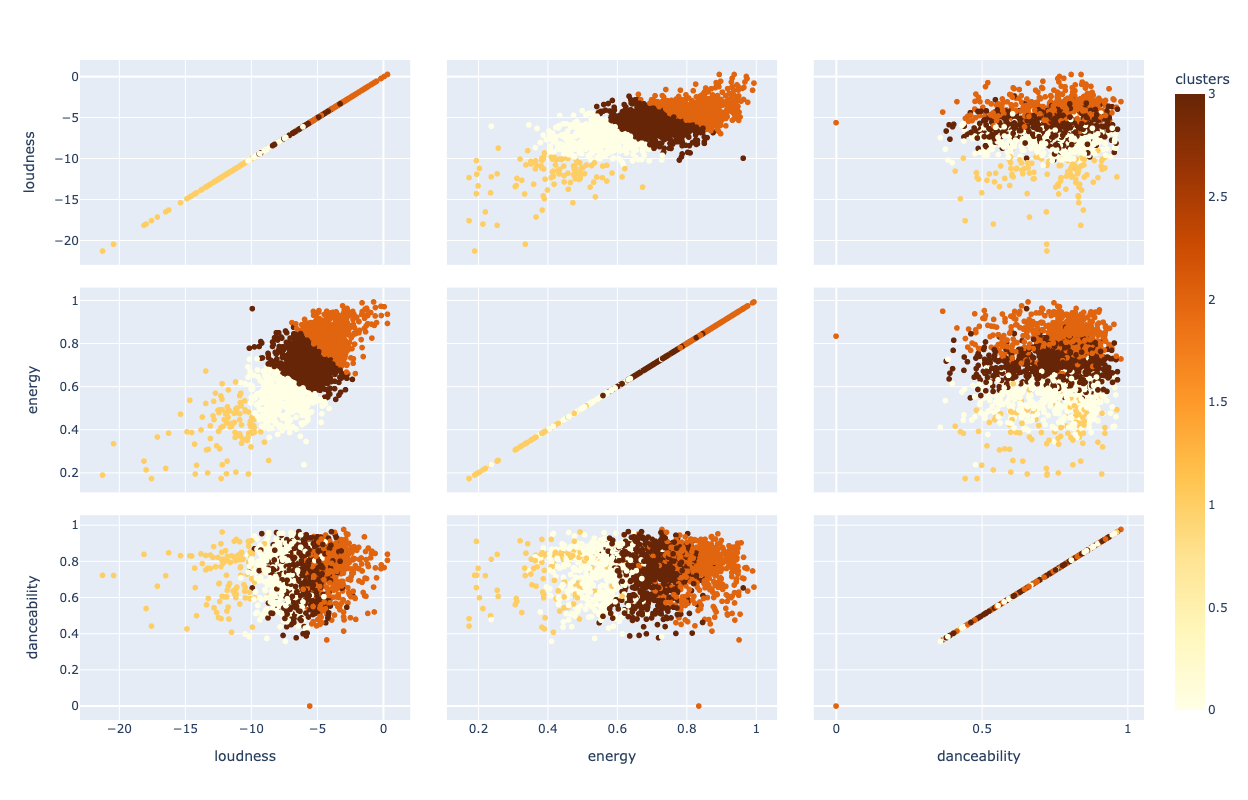

In [19]:
fig = px.scatter_matrix(df,
    dimensions=['loudness', 'energy', 'danceability'],color='clusters',color_continuous_scale='ylorbr',hover_name='track_name', height=800)
fig.show()

#### The figure above shows that a cluster of 4 does a good job in seperating the features('loudness', 'energy', 'danceability')

#### Top ten songs based on popularity

In [20]:
top_ten_songs = afrobeats.sort_values(by='track_pop',ascending=False).iloc[:10]
top_ten_songs[['track_name','artist_name']]

track_name   artist_name
1490                                         Woman      Doja Cat
376                       love nwantiti (ah ah ah)          CKay
284                                      One Dance         Drake
217   love nwantiti (feat. Dj Yo! & AX'EL) - Remix          CKay
178                                           Peru   Fireboy DML
278                     Location (feat. Burna Boy)          Dave
182                                        Finesse        Pheelz
1397                         Dégaine (feat. Damso)  Aya Nakamura
374                           Essence (feat. Tems)        WizKid
1486             Jerusalema (feat. Nomcebo Zikode)     Master KG

#### Time Series Analysis

Performing time series analysis helps me see the different features of the songs change over time.

Create a new dataframe with the track features and the year released

In [38]:
df_date = afrobeats[features]
df_date['track_name'] = afrobeats['track_name']

/var/folders/db/yz8g3qx147g7dfn7_8w2pxl80000gn/T/ipykernel_68710/2610180206.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
df_date['Date'] = afrobeats['year_released'].copy()

/var/folders/db/yz8g3qx147g7dfn7_8w2pxl80000gn/T/ipykernel_68710/2519015997.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
df_date.head(2)

danceability  energy  loudness  mode  speechiness  acousticness  \
0         0.544   0.730    -4.299   0.0       0.1440         0.344   
1         0.793   0.734    -9.252   0.0       0.0981         0.323   

   instrumentalness  liveness  valence    tempo           track_name  \
0          0.000001     0.140    0.751  162.112  Oleku (feat. Brymo)   
1          0.000002     0.777    0.793  125.032            Move Back   

         Date  
0  2010-09-21  
1  2011-04-08

In [41]:
df_date['Date'].dtype

dtype('O')

Using the to_datetime method, I will convert the Date column to a date time object

In [42]:
df_date['Date'] = pd.to_datetime(df_date['Date'])

/var/folders/db/yz8g3qx147g7dfn7_8w2pxl80000gn/T/ipykernel_68710/583905623.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
df_date['Date'].dtype

dtype('<M8[ns]')

Set the Dale column as index and sort index

In [44]:
df_date = df_date.set_index('Date')

In [45]:
df_date.sort_index(inplace=True)

In [46]:
df_date

danceability  energy  loudness  mode  speechiness  acousticness  \
Date                                                                          
2003-01-01         0.834   0.674   -13.455   0.0       0.0721       0.12400   
2004-05-15         0.480   0.853    -2.081   0.0       0.3810       0.48300   
2005-10-24         0.654   0.964    -9.924   1.0       0.0511       0.06780   
2007-01-01         0.906   0.562    -3.355   1.0       0.1570       0.16700   
2008-01-01         0.824   0.965    -2.742   1.0       0.0409       0.24500   
...                  ...     ...       ...   ...          ...           ...   
2022-03-25         0.745   0.769    -5.698   0.0       0.0782       0.69800   
2022-03-25         0.581   0.692    -6.304   1.0       0.0482       0.15200   
2022-03-27         0.861   0.588    -8.861   1.0       0.2430       0.00913   
2022-03-30         0.829   0.760    -6.022   1.0       0.0997       0.23300   
2022-03-31         0.887   0.523    -7.725   0.0       0.2020       0.03060   

            instrumentalness  liveness  valence    tempo  \
Date                                                       
2003-01-01          0.000000    0.0828    0.951  119.039   
2004-05-15          0.000000    0.6060    0.539   79.362   
2005-10-24          0.861000    0.0908    0.937  120.247   
2007-01-01          0.000002    0.0794    0.928  126.011   
2008-01-01          0.000098    0.0983    0.902  110.030   
...                      ...       ...      ...      ...   
2022-03-25          0.000035    0.3900    0.731  103.987   
2022-03-25          0.000811    0.1090    0.193  102.783   
2022-03-27          0.000000    0.0591    0.705  111.995   
2022-03-30          0.224000    0.1030    0.888  100.120   
2022-03-31          0.000728    0.0770    0.437  109.983   

                                  track_name  
Date                                          
2003-01-01                          1er Gaou  
2004-05-15                     African Queen  
2005-10-24                         Ake Bo Je  
2007-01-01                           Bum Bum  
2008-01-01                         Gongo Aso  
...                                      ...  
2022-03-25                             Carry  
2022-03-25                              Love  
2022-03-27  Sungba (feat. Burna Boy) - Remix  
2022-03-30                            Cubana  
2022-03-31                       Talk and Do  

[1870 rows x 11 columns]

I will use data from 2010 to 2022

In [47]:
df_date = df_date.loc['2010':'2022']

In [48]:
df_date

danceability  energy  loudness  mode  speechiness  acousticness  \
Date                                                                          
2010-03-26         0.876   0.847    -5.642   1.0       0.2200       0.13400   
2010-07-20         0.748   0.991    -1.607   1.0       0.1980       0.30600   
2010-08-01         0.744   0.747    -6.240   1.0       0.0549       0.40500   
2010-09-06         0.842   0.926    -3.830   1.0       0.1240       0.06220   
2010-09-21         0.544   0.730    -4.299   0.0       0.1440       0.34400   
...                  ...     ...       ...   ...          ...           ...   
2022-03-25         0.745   0.769    -5.698   0.0       0.0782       0.69800   
2022-03-25         0.581   0.692    -6.304   1.0       0.0482       0.15200   
2022-03-27         0.861   0.588    -8.861   1.0       0.2430       0.00913   
2022-03-30         0.829   0.760    -6.022   1.0       0.0997       0.23300   
2022-03-31         0.887   0.523    -7.725   0.0       0.2020       0.03060   

            instrumentalness  liveness  valence    tempo  \
Date                                                       
2010-03-26          0.011400    0.1150    0.759  124.950   
2010-07-20          0.000165    0.2180    0.666  116.204   
2010-08-01          0.000000    0.0867    0.774  120.044   
2010-09-06          0.000049    0.1360    0.963  119.998   
2010-09-21          0.000001    0.1400    0.751  162.112   
...                      ...       ...      ...      ...   
2022-03-25          0.000035    0.3900    0.731  103.987   
2022-03-25          0.000811    0.1090    0.193  102.783   
2022-03-27          0.000000    0.0591    0.705  111.995   
2022-03-30          0.224000    0.1030    0.888  100.120   
2022-03-31          0.000728    0.0770    0.437  109.983   

                                  track_name  
Date                                          
2010-03-26                           Wengeze  
2010-07-20                            Adamma  
2010-08-01                           You Bad  
2010-09-06                              Away  
2010-09-21               Oleku (feat. Brymo)  
...                                      ...  
2022-03-25                             Carry  
2022-03-25                              Love  
2022-03-27  Sungba (feat. Burna Boy) - Remix  
2022-03-30                            Cubana  
2022-03-31                       Talk and Do  

[1858 rows x 11 columns]

Resampling the data by year with mean as aggregate helps to create a more smoother chart

In [49]:
df_year = df_date.resample('Y').mean()

In [50]:
df_year

danceability    energy  loudness      mode  speechiness  \
Date                                                                  
2010-12-31      0.750800  0.848200 -4.323600  0.800000     0.148180   
2011-12-31      0.762957  0.811000 -5.304043  0.521739     0.160530   
2012-12-31      0.767650  0.847450 -4.399800  0.650000     0.130600   
2013-12-31      0.742826  0.832478 -4.000609  0.608696     0.124704   
2014-12-31      0.763038  0.821269 -4.385692  0.538462     0.117438   
2015-12-31      0.726200  0.749633 -5.044700  0.466667     0.149560   
2016-12-31      0.775985  0.735403 -4.984000  0.507463     0.117721   
2017-12-31      0.793424  0.691167 -5.342924  0.606061     0.113792   
2018-12-31      0.780058  0.690658 -5.891994  0.580645     0.112065   
2019-12-31      0.753461  0.662150 -6.282549  0.424870     0.140055   
2020-12-31      0.738071  0.683513 -6.057718  0.475746     0.141033   
2021-12-31      0.736832  0.666779 -6.614373  0.429474     0.146449   
2022-12-31      0.745524  0.666578 -6.814163  0.374150     0.148565   

            acousticness  instrumentalness  liveness   valence       tempo  
Date                                                                        
2010-12-31      0.250240          0.002323  0.139140  0.782600  128.661600  
2011-12-31      0.256672          0.055558  0.168535  0.806391  120.761261  
2012-12-31      0.237980          0.000452  0.187920  0.848350  124.556050  
2013-12-31      0.278704          0.005716  0.182739  0.813870  118.264783  
2014-12-31      0.204267          0.015038  0.150154  0.806327  122.849923  
2015-12-31      0.141077          0.014165  0.115133  0.779633  125.735100  
2016-12-31      0.292601          0.009035  0.121154  0.763104  113.369284  
2017-12-31      0.232474          0.009430  0.126201  0.797068  111.941795  
2018-12-31      0.258677          0.021851  0.135519  0.752581  112.340619  
2019-12-31      0.300394          0.025961  0.142711  0.687065  112.960912  
2020-12-31      0.284169          0.027313  0.150255  0.665102  114.214045  
2021-12-31      0.293256          0.023844  0.143170  0.631065  114.144606  
2022-12-31      0.301693          0.035034  0.139585  0.604735  114.489585

#### Visualization

Using the dataframes created above, let's look at the different features and how they have changed over time

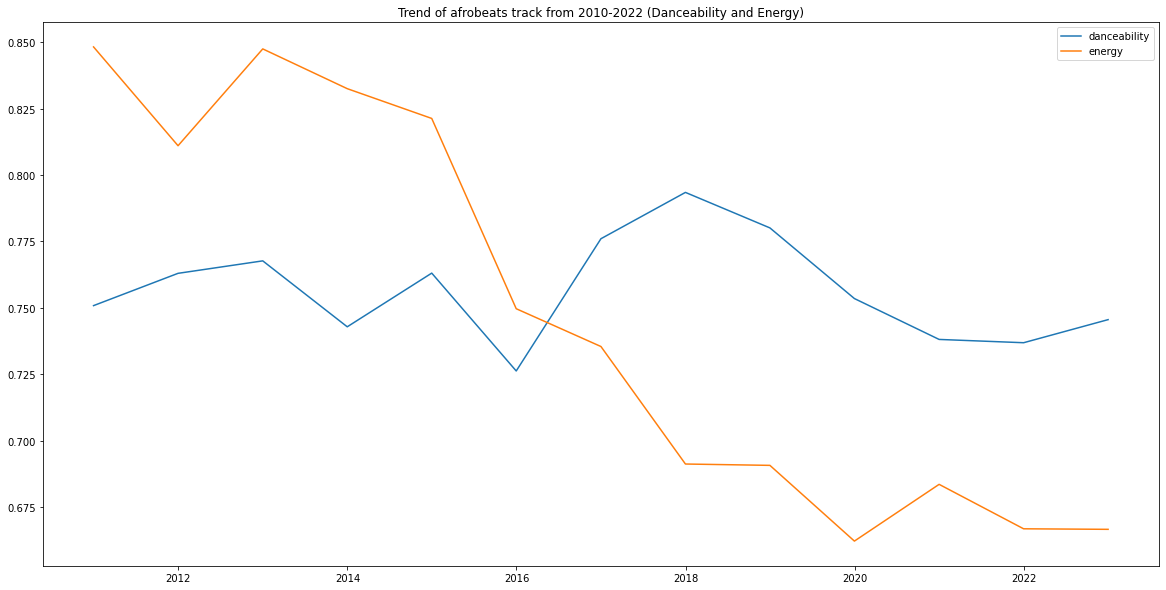

In [51]:
plt.figure(figsize = (20,10))
plt.plot( df_year['danceability'], label='danceability')
plt.plot( df_year['energy'], label='energy')
plt.title('Trend of afrobeats track from 2010-2022 (Danceability and Energy)')
plt.legend();

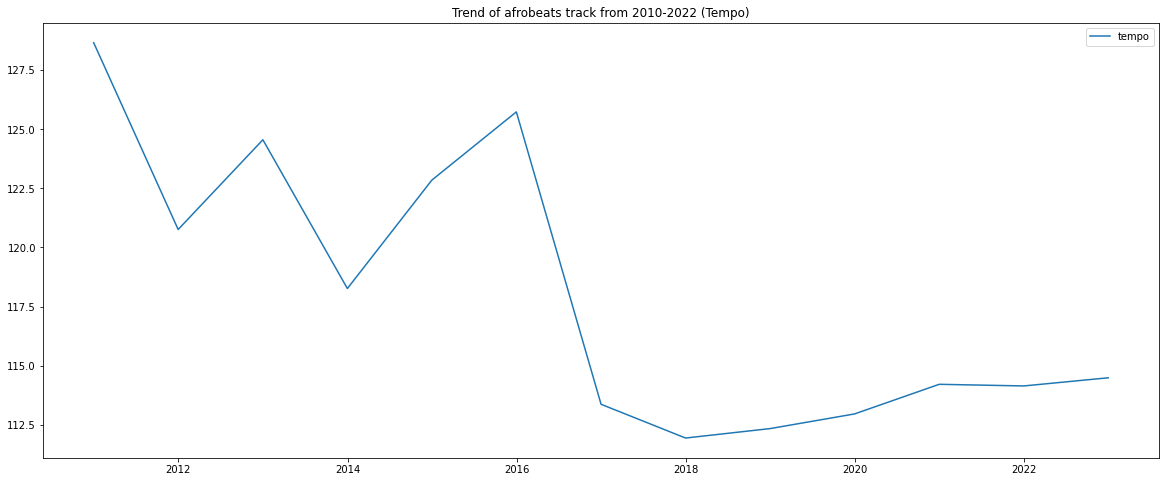

In [52]:
plt.figure(figsize = (20,8))
plt.plot( df_year['tempo'], label='tempo')
plt.title('Trend of afrobeats track from 2010-2022 (Tempo)')
plt.legend();

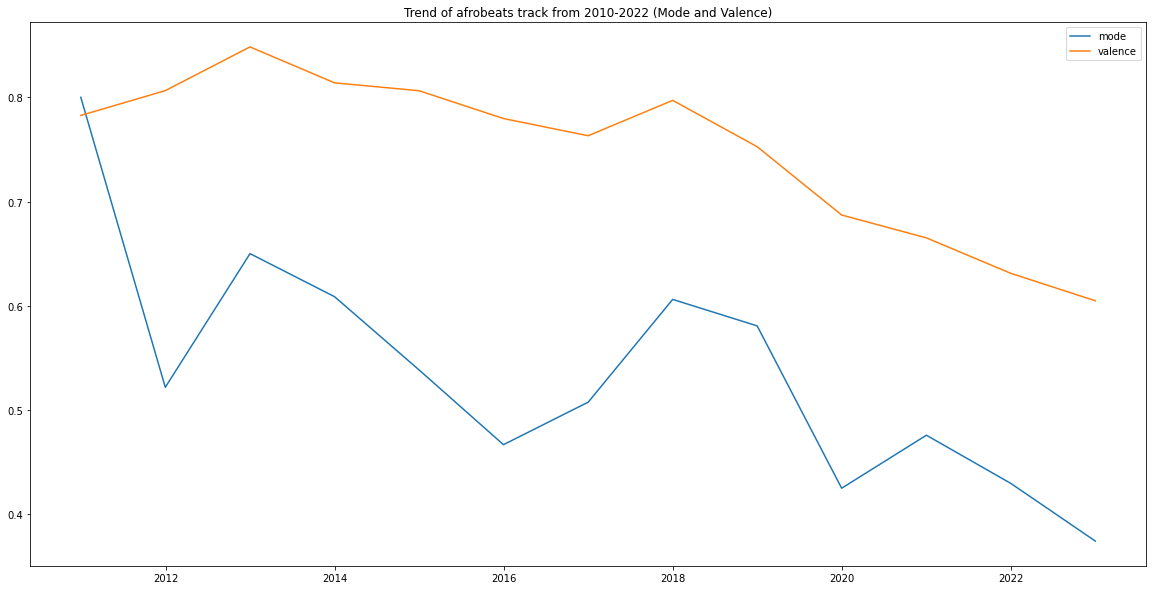

In [53]:
plt.figure(figsize = (20,10))
plt.plot( df_year['mode'], label='mode')
plt.plot( df_year['valence'], label='valence')
plt.title('Trend of afrobeats track from 2010-2022 (Mode and Valence)')
plt.legend();

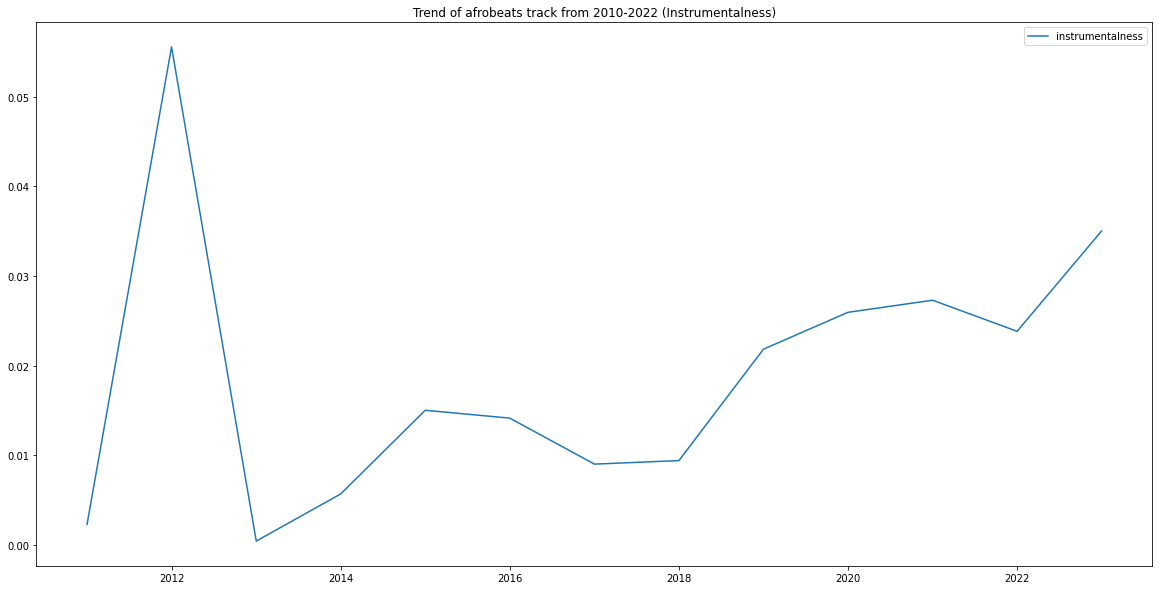

In [54]:
plt.figure(figsize = (20,10))
plt.plot( df_year['instrumentalness'], label='instrumentalness')
plt.title('Trend of afrobeats track from 2010-2022 (Instrumentalness)')
plt.legend();

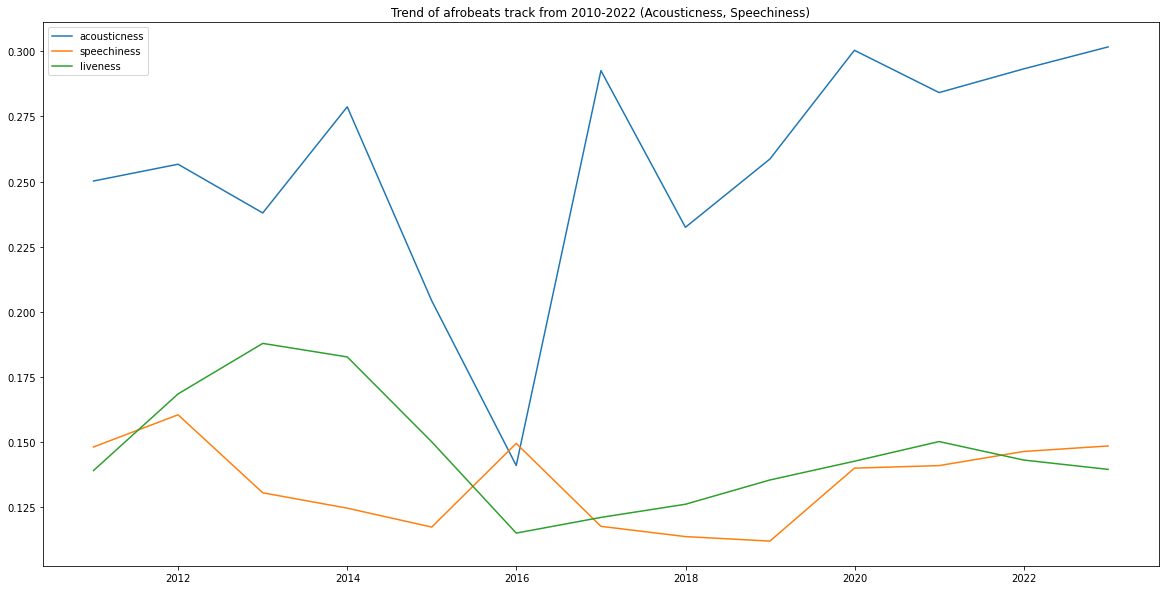

In [55]:
plt.figure(figsize = (20,10))
plt.plot( df_year['acousticness'], label='acousticness')
plt.plot( df_year['speechiness'], label='speechiness')
plt.plot( df_year['liveness'], label='liveness')
plt.title('Trend of afrobeats track from 2010-2022 (Acousticness, Speechiness)')
plt.legend();

#### Let's compare the sounds of modern afrobeats with Fela's sound

I am going to compare the features of modern afrobeats and that of Fela( afrobeat pioneer) 

In [60]:
df_fela = fela[features].copy()

In [61]:
df_fela['instrumentalness'].mean()

0.10702085714285714

In [62]:
df_year['instrumentalness'].mean()

0.01890160036673671

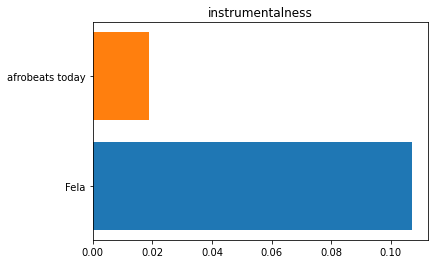

In [63]:
plt.barh('Fela', df_fela['instrumentalness'].mean())
plt.barh('afrobeats today', df_year['instrumentalness'].mean())
plt.title('instrumentalness')
plt.show();

The chart above shows that modern afrobeats has less instrument as compared to Fela's music

In [64]:
df_fela['speechiness'].mean()

0.08302857142857144

In [65]:
df_year['speechiness'].mean()

0.1346687741696623

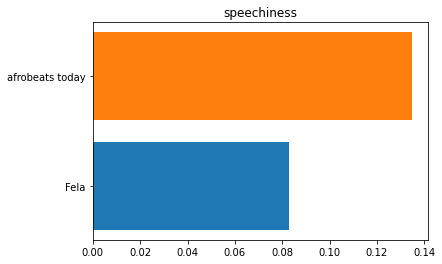

In [66]:
plt.barh('Fela', df_fela['speechiness'].mean())
plt.barh('afrobeats today', df_year['speechiness'].mean())
plt.title('speechiness')
plt.show();

As the amount of instrumentals dropped, speechiness increased. Afrobeats artist today tend to have more lyrics in their songs

#### Comparnig Afrobeats features with features from other Genres

#### Import the other genre's

In [67]:
country = pd.read_csv('../data/country.csv')

In [68]:
hiphop = pd.read_csv('../data/hiphop.csv')

In [69]:
rnb = pd.read_csv('../data/rnb.csv')

In [70]:
metal = pd.read_csv('../data/heavymetal.csv')

In [71]:
jazz = pd.read_csv('../data/jazz.csv')

In [72]:
rock = pd.read_csv('../data/rock.csv')

#### Instrumentslness

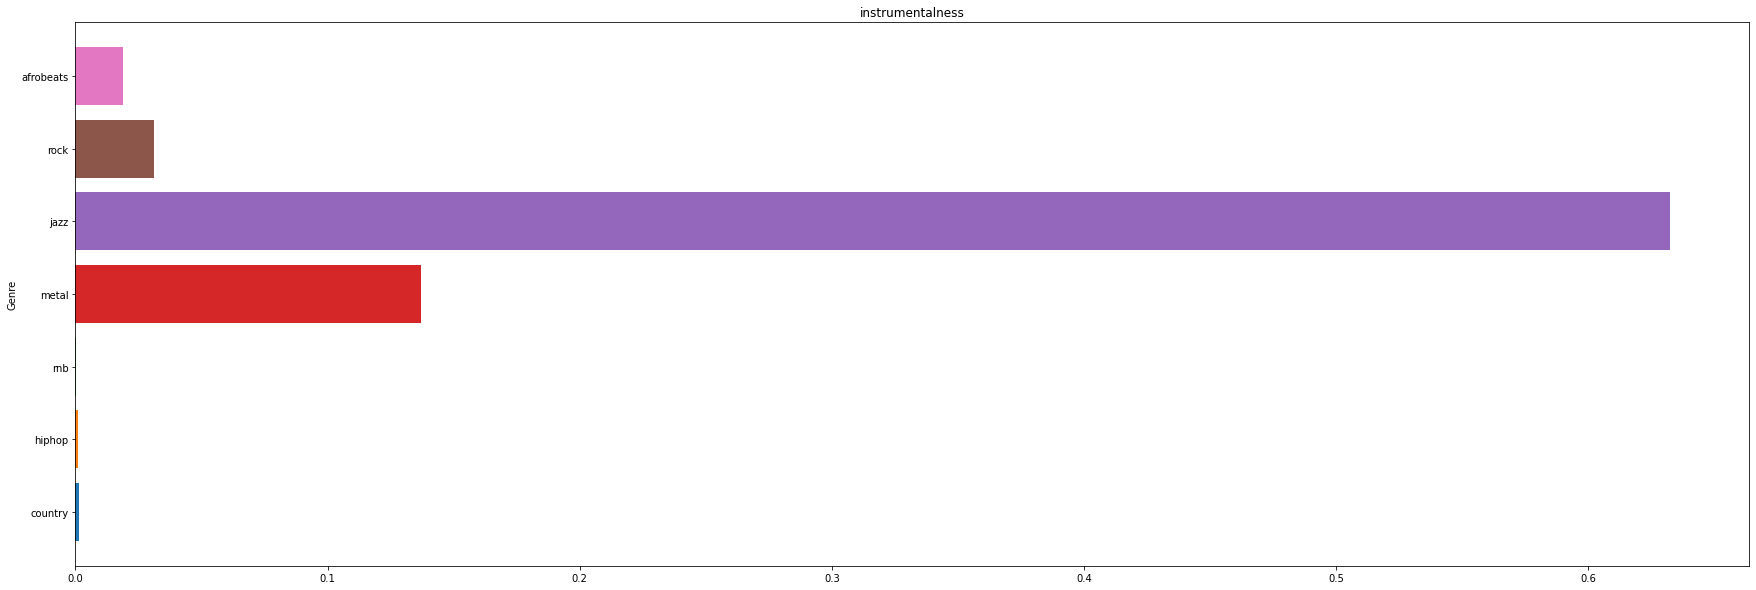

In [73]:
plt.figure(figsize = (30,10))
plt.barh('country', country['instrumentalness'].mean())
plt.barh('hiphop', hiphop['instrumentalness'].mean())
plt.barh('rnb', rnb['instrumentalness'].mean())
plt.barh('metal', metal['instrumentalness'].mean())
plt.barh('jazz', jazz['instrumentalness'].mean())
plt.barh('rock', rock['instrumentalness'].mean())
plt.barh('afrobeats', df_year['instrumentalness'].mean())
plt.title('instrumentalness')
plt.ylabel('Genre')
plt.show();

#### Danceability

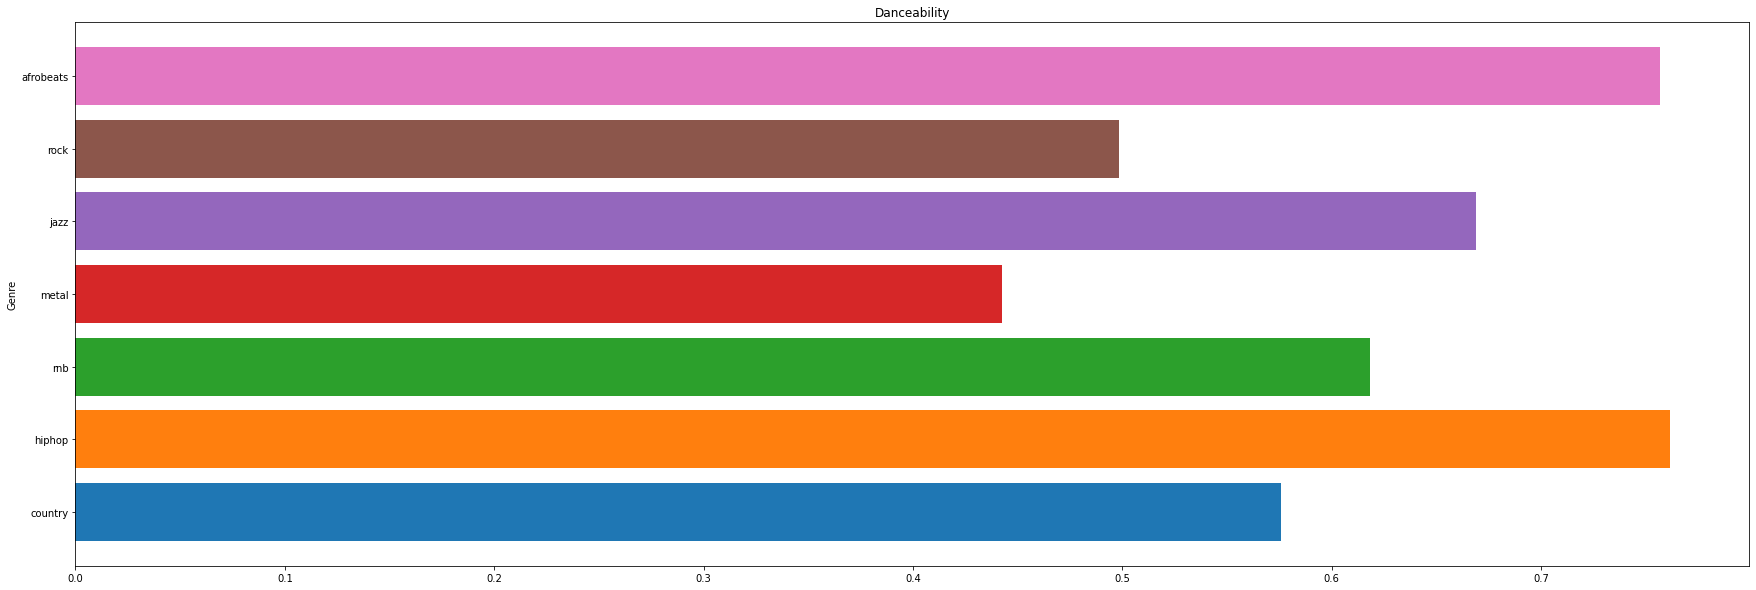

In [74]:
plt.figure(figsize = (30,10))
plt.barh('country', country['danceability'].mean())
plt.barh('hiphop', hiphop['danceability'].mean())
plt.barh('rnb', rnb['danceability'].mean())
plt.barh('metal', metal['danceability'].mean())
plt.barh('jazz', jazz['danceability'].mean())
plt.barh('rock', rock['danceability'].mean())
plt.barh('afrobeats', df_year['danceability'].mean())
plt.title('Danceability')
plt.ylabel('Genre')
plt.show();

#### Energy

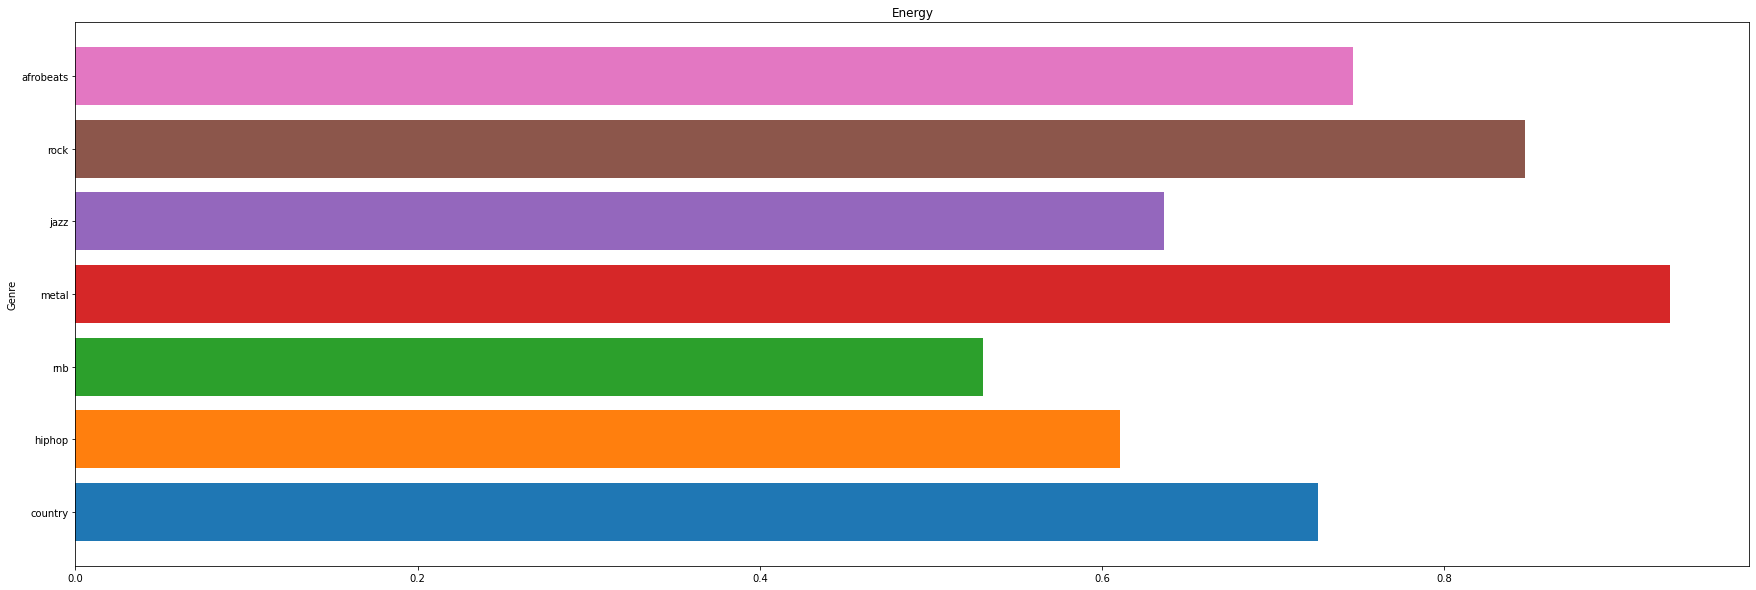

In [75]:
plt.figure(figsize = (30,10))
plt.barh('country', country['energy'].mean())
plt.barh('hiphop', hiphop['energy'].mean())
plt.barh('rnb', rnb['energy'].mean())
plt.barh('metal', metal['energy'].mean())
plt.barh('jazz', jazz['energy'].mean())
plt.barh('rock', rock['energy'].mean())
plt.barh('afrobeats', df_year['energy'].mean())
plt.title('Energy')
plt.ylabel('Genre')
plt.show();

#### In the next notebook, I will be using the playlists gotten from my classmates to create a recommendation system.